In [81]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
%matplotlib inline

In [82]:
w = pd.read_csv('https://raw.githubusercontent.com/borja876/Thinkful-DataScience-Borja/master/Electricity%20Consumption.csv')
x = pd.read_csv('https://raw.githubusercontent.com/borja876/Thinkful-DataScience-Borja/master/GDP%20current%20prices.csv')
y = pd.read_csv('https://raw.githubusercontent.com/borja876/Thinkful-DataScience-Borja/master/Population.csv')

In [83]:
df = pd.DataFrame(w)
df1 = pd.DataFrame(x)
df2 = pd.DataFrame(y)

In [84]:
#Cleanse Data Frame Electricity Consumption:
#Take out rows without countries
#Rename columns
#Clean columns taking out those that are not used
dfa= df[:3206]
dfb= dfa.rename(columns={'Country or Area': 'Country', 'Quantity': 'Household Consumption (GWh)'})
dfc = dfb.drop(["Quantity Footnotes", "Unit", "Commodity - Transaction"], axis=1)
dfc['Year'] = dfc['Year'].astype(int)
dfc.head()

,Country,Year,Household Consumption (GWh)
0,Afghanistan,2014,2204.9
1,Afghanistan,2013,1633.5
2,Afghanistan,2012,1922.0
3,Afghanistan,2011,1145.0
4,Afghanistan,2010,1387.0


Analyse Data set: count zeros, Nan

In [85]:
#Cleanse Data Frame GDP Current Prices (USD):
#Take out rows without countries
#Rename columns
#Clean columns taking out those that are not used
dfd= df1[:3322]
dfe= dfd.rename(columns={'Country or Area': 'Country', 'Value': 'GDP Current Prices (USD)'})
dfg = dfe.drop('Value Footnotes', axis=1)
dfg['Year'] = dfg['Year'].astype(int)
dfg.head()

,Country,Year,GDP Current Prices (USD)
0,Afghanistan,2014,2.005019e+10
1,Afghanistan,2013,2.004633e+10
2,Afghanistan,2012,2.053654e+10
3,Afghanistan,2011,1.793024e+10
4,Afghanistan,2010,1.593680e+10


In [86]:
#Cleanse Data Frame Population:
#Take out rows without countries
#Rename columns
#Clean columns taking out those that are not used
dfh= df2[:3522]
dfi= dfh.rename(columns={'Country or Area': 'Country', 'Value': 'Population'})
dfj = dfi.drop('Value Footnotes', axis=1)
dfj['Year'] = dfj['Year'].astype(int)
dfj.head()

,Country,Year,Population
0,Afghanistan,2014,31627506.0
1,Afghanistan,2013,30682500.0
2,Afghanistan,2012,29726803.0
3,Afghanistan,2011,28809167.0
4,Afghanistan,2010,27962207.0


In [87]:
#Merge data into a single dataset
result = dfc.merge(dfg, left_on=["Country","Year"], right_on=["Country","Year"], how='outer')
result.head()

,Country,Year,Household Consumption (GWh),GDP Current Prices (USD)
0,Afghanistan,2014,2204.9,2.005019e+10
1,Afghanistan,2013,1633.5,2.004633e+10
2,Afghanistan,2012,1922.0,2.053654e+10
3,Afghanistan,2011,1145.0,1.793024e+10
4,Afghanistan,2010,1387.0,1.593680e+10


In [88]:
result = result.merge(dfj, left_on=["Country","Year"], right_on=["Country","Year"], how='outer')
result.head()

,Country,Year,Household Consumption (GWh),GDP Current Prices (USD),Population
0,Afghanistan,2014,2204.9,2.005019e+10,31627506.0
1,Afghanistan,2013,1633.5,2.004633e+10,30682500.0
2,Afghanistan,2012,1922.0,2.053654e+10,29726803.0
3,Afghanistan,2011,1145.0,1.793024e+10,28809167.0
4,Afghanistan,2010,1387.0,1.593680e+10,27962207.0


In [89]:
#Cleanse new dataset
result = result.dropna()

In [90]:
#Use population as a common ground to standardise GDP and household consumption so that both are comparable

result['GDP Current Prices (USD) per Capita'] =(result['GDP Current Prices (USD)'])/result['Population']
result['Household Consumption (kWh) per Capita'] = (result['Household Consumption (GWh)']*1000000)/result['Population']
result

,Country,Year,Household Consumption (GWh),GDP Current Prices (USD),Population,GDP Current Prices (USD) per Capita,Household Consumption (kWh) per Capita
0,Afghanistan,2014,2204.90,2.005019e+10,31627506.0,633.947864,69.714634
1,Afghanistan,2013,1633.50,2.004633e+10,30682500.0,653.347488,53.238817
2,Afghanistan,2012,1922.00,2.053654e+10,29726803.0,690.842629,64.655456
3,Afghanistan,2011,1145.00,1.793024e+10,28809167.0,622.379654,39.744294
4,Afghanistan,2010,1387.00,1.593680e+10,27962207.0,569.940729,49.602665
5,Afghanistan,2009,300.00,1.248694e+10,27207291.0,458.955782,11.026456
6,Afghanistan,2008,300.00,1.019053e+10,26528741.0,384.131681,11.308490
7,Afghanistan,2007,300.00,9.843842e+09,25877544.0,380.400955,11.593063
8,Afghanistan,2006,300.00,7.057598e+09,25183615.0,280.245644,11.912507
9,Afghanistan,2005,150.00,6.275076e+09,24399948.0,257.175795,6.147554


In [91]:
#Identify countries in Continents so that data can be compared among Continents
countries = [
{'timezones': ['Europe/Andorra'], 'code': 'AD', 'continent': 'Europe', 'name': 'Andorra', 'capital': 'Andorra la Vella'},
{'timezones': ['Asia/Kabul'], 'code': 'AF', 'continent': 'Asia', 'name': 'Afghanistan', 'capital': 'Kabul'},
{'timezones': ['America/Antigua'], 'code': 'AG', 'continent': 'North America', 'name': 'Antigua and Barbuda', 'capital': "St. John's"},
{'timezones': ['Europe/Tirane'], 'code': 'AL', 'continent': 'Europe', 'name': 'Albania', 'capital': 'Tirana'},
{'timezones': ['Asia/Yerevan'], 'code': 'AM', 'continent': 'Asia', 'name': 'Armenia', 'capital': 'Yerevan'},
{'timezones': ['Africa/Luanda'], 'code': 'AO', 'continent': 'Africa', 'name': 'Angola', 'capital': 'Luanda'},
{'timezones': ['America/Argentina/Buenos_Aires', 'America/Argentina/Cordoba', 'America/Argentina/Jujuy', 'America/Argentina/Tucuman', 'America/Argentina/Catamarca', 'America/Argentina/La_Rioja', 'America/Argentina/San_Juan', 'America/Argentina/Mendoza', 'America/Argentina/Rio_Gallegos', 'America/Argentina/Ushuaia'], 'code': 'AR', 'continent': 'South America', 'name': 'Argentina', 'capital': 'Buenos Aires'},
{'timezones': ['Europe/Vienna'], 'code': 'AT', 'continent': 'Europe', 'name': 'Austria', 'capital': 'Vienna'},
{'timezones': ['Australia/Lord_Howe', 'Australia/Hobart', 'Australia/Currie', 'Australia/Melbourne', 'Australia/Sydney', 'Australia/Broken_Hill', 'Australia/Brisbane', 'Australia/Lindeman', 'Australia/Adelaide', 'Australia/Darwin', 'Australia/Perth'], 'code': 'AU', 'continent': 'Oceania', 'name': 'Australia', 'capital': 'Canberra'},
{'timezones': ['Asia/Baku'], 'code': 'AZ', 'continent': 'Asia', 'name': 'Azerbaijan', 'capital': 'Baku'},
{'timezones': ['America/Barbados'], 'code': 'BB', 'continent': 'North America', 'name': 'Barbados', 'capital': 'Bridgetown'},
{'timezones': ['Asia/Dhaka'], 'code': 'BD', 'continent': 'Asia', 'name': 'Bangladesh', 'capital': 'Dhaka'},
{'timezones': ['Europe/Brussels'], 'code': 'BE', 'continent': 'Europe', 'name': 'Belgium', 'capital': 'Brussels'},
{'timezones': ['Africa/Ouagadougou'], 'code': 'BF', 'continent': 'Africa', 'name': 'Burkina Faso', 'capital': 'Ouagadougou'},
{'timezones': ['Europe/Sofia'], 'code': 'BG', 'continent': 'Europe', 'name': 'Bulgaria', 'capital': 'Sofia'},
{'timezones': ['Asia/Bahrain'], 'code': 'BH', 'continent': 'Asia', 'name': 'Bahrain', 'capital': 'Manama'},
{'timezones': ['Africa/Bujumbura'], 'code': 'BI', 'continent': 'Africa', 'name': 'Burundi', 'capital': 'Bujumbura'},
{'timezones': ['Africa/Porto-Novo'], 'code': 'BJ', 'continent': 'Africa', 'name': 'Benin', 'capital': 'Porto-Novo'},
{'timezones': ['Asia/Brunei'], 'code': 'BN', 'continent': 'Asia', 'name': 'Brunei Darussalam', 'capital': 'Bandar Seri Begawan'},
{'timezones': ['America/La_Paz'], 'code': 'BO', 'continent': 'South America', 'name': 'Bolivia', 'capital': 'Sucre'},
{'timezones': ['America/Noronha', 'America/Belem', 'America/Fortaleza', 'America/Recife', 'America/Araguaina', 'America/Maceio', 'America/Bahia', 'America/Sao_Paulo', 'America/Campo_Grande', 'America/Cuiaba', 'America/Porto_Velho', 'America/Boa_Vista', 'America/Manaus', 'America/Eirunepe', 'America/Rio_Branco'], 'code': 'BR', 'continent': 'South America', 'name': 'Brazil', 'capital': 'Bras\xc3\xadlia'},
{'timezones': ['America/Nassau'], 'code': 'BS', 'continent': 'North America', 'name': 'Bahamas', 'capital': 'Nassau'},
{'timezones': ['Asia/Thimphu'], 'code': 'BT', 'continent': 'Asia', 'name': 'Bhutan', 'capital': 'Thimphu'},
{'timezones': ['Africa/Gaborone'], 'code': 'BW', 'continent': 'Africa', 'name': 'Botswana', 'capital': 'Gaborone'},
{'timezones': ['Europe/Minsk'], 'code': 'BY', 'continent': 'Europe', 'name': 'Belarus', 'capital': 'Minsk'},
{'timezones': ['America/Belize'], 'code': 'BZ', 'continent': 'North America', 'name': 'Belize', 'capital': 'Belmopan'},
{'timezones': ['America/St_Johns', 'America/Halifax', 'America/Glace_Bay', 'America/Moncton', 'America/Goose_Bay', 'America/Blanc-Sablon', 'America/Montreal', 'America/Toronto', 'America/Nipigon', 'America/Thunder_Bay', 'America/Pangnirtung', 'America/Iqaluit', 'America/Atikokan', 'America/Rankin_Inlet', 'America/Winnipeg', 'America/Rainy_River', 'America/Cambridge_Bay', 'America/Regina', 'America/Swift_Current', 'America/Edmonton', 'America/Yellowknife', 'America/Inuvik', 'America/Dawson_Creek', 'America/Vancouver', 'America/Whitehorse', 'America/Dawson'], 'code': 'CA', 'continent': 'North America', 'name': 'Canada', 'capital': 'Ottawa'},
{'timezones': ['Africa/Kinshasa', 'Africa/Lubumbashi'], 'code': 'CD', 'continent': 'Africa', 'name': 'Democratic Republic of the Congo', 'capital': 'Kinshasa'},
{'timezones': ['Africa/Brazzaville'], 'code': 'CG', 'continent': 'Africa', 'name': 'Republic of the Congo', 'capital': 'Brazzaville'},
{'timezones': ['Africa/Abidjan'], 'code': 'CI', 'continent': 'Africa', 'name': "C\xc3\xb4te d'Ivoire", 'capital': 'Yamoussoukro'},
{'timezones': ['America/Santiago', 'Pacific/Easter'], 'code': 'CL', 'continent': 'South America', 'name': 'Chile', 'capital': 'Santiago'},
{'timezones': ['Africa/Douala'], 'code': 'CM', 'continent': 'Africa', 'name': 'Cameroon', 'capital': 'Yaound\xc3\xa9'},
{'timezones': ['Asia/Shanghai', 'Asia/Harbin', 'Asia/Chongqing', 'Asia/Urumqi', 'Asia/Kashgar'], 'code': 'CN', 'continent': 'Asia', 'name': "People's Republic of China", 'capital': 'Beijing'},
{'timezones': ['America/Bogota'], 'code': 'CO', 'continent': 'South America', 'name': 'Colombia', 'capital': 'Bogot\xc3\xa1'},
{'timezones': ['America/Costa_Rica'], 'code': 'CR', 'continent': 'North America', 'name': 'Costa Rica', 'capital': 'San Jos\xc3\xa9'},
{'timezones': ['America/Havana'], 'code': 'CU', 'continent': 'North America', 'name': 'Cuba', 'capital': 'Havana'},
{'timezones': ['Atlantic/Cape_Verde'], 'code': 'CV', 'continent': 'Africa', 'name': 'Cape Verde', 'capital': 'Praia'},
{'timezones': ['Asia/Nicosia'], 'code': 'CY', 'continent': 'Asia', 'name': 'Cyprus', 'capital': 'Nicosia'},
{'timezones': ['Europe/Prague'], 'code': 'CZ', 'continent': 'Europe', 'name': 'Czech Republic', 'capital': 'Prague'},
{'timezones': ['Europe/Berlin'], 'code': 'DE', 'continent': 'Europe', 'name': 'Germany', 'capital': 'Berlin'},
{'timezones': ['Africa/Djibouti'], 'code': 'DJ', 'continent': 'Africa', 'name': 'Djibouti', 'capital': 'Djibouti City'},
{'timezones': ['Europe/Copenhagen'], 'code': 'DK', 'continent': 'Europe', 'name': 'Denmark', 'capital': 'Copenhagen'},
{'timezones': ['America/Dominica'], 'code': 'DM', 'continent': 'North America', 'name': 'Dominica', 'capital': 'Roseau'},
{'timezones': ['America/Santo_Domingo'], 'code': 'DO', 'continent': 'North America', 'name': 'Dominican Republic', 'capital': 'Santo Domingo'},
{'timezones': ['America/Guayaquil', 'Pacific/Galapagos'], 'code': 'EC', 'continent': 'South America', 'name': 'Ecuador', 'capital': 'Quito'},
{'timezones': ['Europe/Tallinn'], 'code': 'EE', 'continent': 'Europe', 'name': 'Estonia', 'capital': 'Tallinn'},
{'timezones': ['Africa/Cairo'], 'code': 'EG', 'continent': 'Africa', 'name': 'Egypt', 'capital': 'Cairo'},
{'timezones': ['Africa/Asmera'], 'code': 'ER', 'continent': 'Africa', 'name': 'Eritrea', 'capital': 'Asmara'},
{'timezones': ['Africa/Addis_Ababa'], 'code': 'ET', 'continent': 'Africa', 'name': 'Ethiopia', 'capital': 'Addis Ababa'},
{'timezones': ['Europe/Helsinki'], 'code': 'FI', 'continent': 'Europe', 'name': 'Finland', 'capital': 'Helsinki'},
{'timezones': ['Pacific/Fiji'], 'code': 'FJ', 'continent': 'Oceania', 'name': 'Fiji', 'capital': 'Suva'},
{'timezones': ['Europe/Paris'], 'code': 'FR', 'continent': 'Europe', 'name': 'France', 'capital': 'Paris'},
{'timezones': ['Africa/Libreville'], 'code': 'GA', 'continent': 'Africa', 'name': 'Gabon', 'capital': 'Libreville'},
{'timezones': ['Asia/Tbilisi'], 'code': 'GE', 'continent': 'Asia', 'name': 'Georgia', 'capital': 'Tbilisi'},
{'timezones': ['Africa/Accra'], 'code': 'GH', 'continent': 'Africa', 'name': 'Ghana', 'capital': 'Accra'},
{'timezones': ['Africa/Banjul'], 'code': 'GM', 'continent': 'Africa', 'name': 'The Gambia', 'capital': 'Banjul'},
{'timezones': ['Africa/Conakry'], 'code': 'GN', 'continent': 'Africa', 'name': 'Guinea', 'capital': 'Conakry'},
{'timezones': ['Europe/Athens'], 'code': 'GR', 'continent': 'Europe', 'name': 'Greece', 'capital': 'Athens'},
{'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Guatemala', 'capital': 'Guatemala City'},
{'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Haiti', 'capital': 'Port-au-Prince'},
{'timezones': ['Africa/Bissau'], 'code': 'GW', 'continent': 'Africa', 'name': 'Guinea-Bissau', 'capital': 'Bissau'},
{'timezones': ['America/Guyana'], 'code': 'GY', 'continent': 'South America', 'name': 'Guyana', 'capital': 'Georgetown'},
{'timezones': ['America/Tegucigalpa'], 'code': 'HN', 'continent': 'North America', 'name': 'Honduras', 'capital': 'Tegucigalpa'},
{'timezones': ['Europe/Budapest'], 'code': 'HU', 'continent': 'Europe', 'name': 'Hungary', 'capital': 'Budapest'},
{'timezones': ['Asia/Jakarta', 'Asia/Pontianak', 'Asia/Makassar', 'Asia/Jayapura'], 'code': 'ID', 'continent': 'Asia', 'name': 'Indonesia', 'capital': 'Jakarta'},
{'timezones': ['Europe/Dublin'], 'code': 'IE', 'continent': 'Europe', 'name': 'Ireland', 'capital': 'Dublin'},
{'timezones': ['Asia/Jerusalem'], 'code': 'IL', 'continent': 'Asia', 'name': 'Israel', 'capital': 'Jerusalem'},
{'timezones': ['Asia/Calcutta'], 'code': 'IN', 'continent': 'Asia', 'name': 'India', 'capital': 'New Delhi'},
{'timezones': ['Asia/Baghdad'], 'code': 'IQ', 'continent': 'Asia', 'name': 'Iraq', 'capital': 'Baghdad'},
{'timezones': ['Asia/Tehran'], 'code': 'IR', 'continent': 'Asia', 'name': 'Iran', 'capital': 'Tehran'},
{'timezones': ['Atlantic/Reykjavik'], 'code': 'IS', 'continent': 'Europe', 'name': 'Iceland', 'capital': 'Reykjav\xc3\xadk'},
{'timezones': ['Europe/Rome'], 'code': 'IT', 'continent': 'Europe', 'name': 'Italy', 'capital': 'Rome'},
{'timezones': ['America/Jamaica'], 'code': 'JM', 'continent': 'North America', 'name': 'Jamaica', 'capital': 'Kingston'},
{'timezones': ['Asia/Amman'], 'code': 'JO', 'continent': 'Asia', 'name': 'Jordan', 'capital': 'Amman'},
{'timezones': ['Asia/Tokyo'], 'code': 'JP', 'continent': 'Asia', 'name': 'Japan', 'capital': 'Tokyo'},
{'timezones': ['Africa/Nairobi'], 'code': 'KE', 'continent': 'Africa', 'name': 'Kenya', 'capital': 'Nairobi'},
{'timezones': ['Asia/Bishkek'], 'code': 'KG', 'continent': 'Asia', 'name': 'Kyrgyzstan', 'capital': 'Bishkek'},
{'timezones': ['Pacific/Tarawa', 'Pacific/Enderbury', 'Pacific/Kiritimati'], 'code': 'KI', 'continent': 'Oceania', 'name': 'Kiribati', 'capital': 'Tarawa'},
{'timezones': ['Asia/Pyongyang'], 'code': 'KP', 'continent': 'Asia', 'name': 'North Korea', 'capital': 'Pyongyang'},
{'timezones': ['Asia/Seoul'], 'code': 'KR', 'continent': 'Asia', 'name': 'South Korea', 'capital': 'Seoul'},
{'timezones': ['Asia/Kuwait'], 'code': 'KW', 'continent': 'Asia', 'name': 'Kuwait', 'capital': 'Kuwait City'},
{'timezones': ['Asia/Beirut'], 'code': 'LB', 'continent': 'Asia', 'name': 'Lebanon', 'capital': 'Beirut'},
{'timezones': ['Europe/Vaduz'], 'code': 'LI', 'continent': 'Europe', 'name': 'Liechtenstein', 'capital': 'Vaduz'},
{'timezones': ['Africa/Monrovia'], 'code': 'LR', 'continent': 'Africa', 'name': 'Liberia', 'capital': 'Monrovia'},
{'timezones': ['Africa/Maseru'], 'code': 'LS', 'continent': 'Africa', 'name': 'Lesotho', 'capital': 'Maseru'},
{'timezones': ['Europe/Vilnius'], 'code': 'LT', 'continent': 'Europe', 'name': 'Lithuania', 'capital': 'Vilnius'},
{'timezones': ['Europe/Luxembourg'], 'code': 'LU', 'continent': 'Europe', 'name': 'Luxembourg', 'capital': 'Luxembourg City'},
{'timezones': ['Europe/Riga'], 'code': 'LV', 'continent': 'Europe', 'name': 'Latvia', 'capital': 'Riga'},
{'timezones': ['Africa/Tripoli'], 'code': 'LY', 'continent': 'Africa', 'name': 'Libya', 'capital': 'Tripoli'},
{'timezones': ['Indian/Antananarivo'], 'code': 'MG', 'continent': 'Africa', 'name': 'Madagascar', 'capital': 'Antananarivo'},
{'timezones': ['Pacific/Majuro', 'Pacific/Kwajalein'], 'code': 'MH', 'continent': 'Oceania', 'name': 'Marshall Islands', 'capital': 'Majuro'},
{'timezones': ['Europe/Skopje'], 'code': 'MK', 'continent': 'Europe', 'name': 'Macedonia', 'capital': 'Skopje'},
{'timezones': ['Africa/Bamako'], 'code': 'ML', 'continent': 'Africa', 'name': 'Mali', 'capital': 'Bamako'},
{'timezones': ['Asia/Rangoon'], 'code': 'MM', 'continent': 'Asia', 'name': 'Myanmar', 'capital': 'Naypyidaw'},
{'timezones': ['Asia/Ulaanbaatar', 'Asia/Hovd', 'Asia/Choibalsan'], 'code': 'MN', 'continent': 'Asia', 'name': 'Mongolia', 'capital': 'Ulaanbaatar'},
{'timezones': ['Africa/Nouakchott'], 'code': 'MR', 'continent': 'Africa', 'name': 'Mauritania', 'capital': 'Nouakchott'},
{'timezones': ['Europe/Malta'], 'code': 'MT', 'continent': 'Europe', 'name': 'Malta', 'capital': 'Valletta'},
{'timezones': ['Indian/Mauritius'], 'code': 'MU', 'continent': 'Africa', 'name': 'Mauritius', 'capital': 'Port Louis'},
{'timezones': ['Indian/Maldives'], 'code': 'MV', 'continent': 'Asia', 'name': 'Maldives', 'capital': 'Mal\xc3\xa9'},
{'timezones': ['Africa/Blantyre'], 'code': 'MW', 'continent': 'Africa', 'name': 'Malawi', 'capital': 'Lilongwe'},
{'timezones': ['America/Mexico_City', 'America/Cancun', 'America/Merida', 'America/Monterrey', 'America/Mazatlan', 'America/Chihuahua', 'America/Hermosillo', 'America/Tijuana'], 'code': 'MX', 'continent': 'North America', 'name': 'Mexico', 'capital': 'Mexico City'},
{'timezones': ['Asia/Kuala_Lumpur', 'Asia/Kuching'], 'code': 'MY', 'continent': 'Asia', 'name': 'Malaysia', 'capital': 'Kuala Lumpur'},
{'timezones': ['Africa/Maputo'], 'code': 'MZ', 'continent': 'Africa', 'name': 'Mozambique', 'capital': 'Maputo'},
{'timezones': ['Africa/Windhoek'], 'code': 'NA', 'continent': 'Africa', 'name': 'Namibia', 'capital': 'Windhoek'},
{'timezones': ['Africa/Niamey'], 'code': 'NE', 'continent': 'Africa', 'name': 'Niger', 'capital': 'Niamey'},
{'timezones': ['Africa/Lagos'], 'code': 'NG', 'continent': 'Africa', 'name': 'Nigeria', 'capital': 'Abuja'},
{'timezones': ['America/Managua'], 'code': 'NI', 'continent': 'North America', 'name': 'Nicaragua', 'capital': 'Managua'},
{'timezones': ['Europe/Amsterdam'], 'code': 'NL', 'continent': 'Europe', 'name': 'Netherlands', 'capital': 'Amsterdam'},
{'timezones': ['Europe/Oslo'], 'code': 'NO', 'continent': 'Europe', 'name': 'Norway', 'capital': 'Oslo'},
{'timezones': ['Asia/Katmandu'], 'code': 'NP', 'continent': 'Asia', 'name': 'Nepal', 'capital': 'Kathmandu'},
{'timezones': ['Pacific/Nauru'], 'code': 'NR', 'continent': 'Oceania', 'name': 'Nauru', 'capital': 'Yaren'},
{'timezones': ['Pacific/Auckland', 'Pacific/Chatham'], 'code': 'NZ', 'continent': 'Oceania', 'name': 'New Zealand', 'capital': 'Wellington'},
{'timezones': ['Asia/Muscat'], 'code': 'OM', 'continent': 'Asia', 'name': 'Oman', 'capital': 'Muscat'},
{'timezones': ['America/Panama'], 'code': 'PA', 'continent': 'North America', 'name': 'Panama', 'capital': 'Panama City'},
{'timezones': ['America/Lima'], 'code': 'PE', 'continent': 'South America', 'name': 'Peru', 'capital': 'Lima'},
{'timezones': ['Pacific/Port_Moresby'], 'code': 'PG', 'continent': 'Oceania', 'name': 'Papua New Guinea', 'capital': 'Port Moresby'},
{'timezones': ['Asia/Manila'], 'code': 'PH', 'continent': 'Asia', 'name': 'Philippines', 'capital': 'Manila'},
{'timezones': ['Asia/Karachi'], 'code': 'PK', 'continent': 'Asia', 'name': 'Pakistan', 'capital': 'Islamabad'},
{'timezones': ['Europe/Warsaw'], 'code': 'PL', 'continent': 'Europe', 'name': 'Poland', 'capital': 'Warsaw'},
{'timezones': ['Europe/Lisbon', 'Atlantic/Madeira', 'Atlantic/Azores'], 'code': 'PT', 'continent': 'Europe', 'name': 'Portugal', 'capital': 'Lisbon'},
{'timezones': ['Pacific/Palau'], 'code': 'PW', 'continent': 'Oceania', 'name': 'Palau', 'capital': 'Ngerulmud'},
{'timezones': ['America/Asuncion'], 'code': 'PY', 'continent': 'South America', 'name': 'Paraguay', 'capital': 'Asunci\xc3\xb3n'},
{'timezones': ['Asia/Qatar'], 'code': 'QA', 'continent': 'Asia', 'name': 'Qatar', 'capital': 'Doha'},
{'timezones': ['Europe/Bucharest'], 'code': 'RO', 'continent': 'Europe', 'name': 'Romania', 'capital': 'Bucharest'},
{'timezones': ['Europe/Kaliningrad', 'Europe/Moscow', 'Europe/Volgograd', 'Europe/Samara', 'Asia/Yekaterinburg', 'Asia/Omsk', 'Asia/Novosibirsk', 'Asia/Krasnoyarsk', 'Asia/Irkutsk', 'Asia/Yakutsk', 'Asia/Vladivostok', 'Asia/Sakhalin', 'Asia/Magadan', 'Asia/Kamchatka', 'Asia/Anadyr'], 'code': 'RU', 'continent': 'Europe', 'name': 'Russia', 'capital': 'Moscow'},
{'timezones': ['Africa/Kigali'], 'code': 'RW', 'continent': 'Africa', 'name': 'Rwanda', 'capital': 'Kigali'},
{'timezones': ['Asia/Riyadh'], 'code': 'SA', 'continent': 'Asia', 'name': 'Saudi Arabia', 'capital': 'Riyadh'},
{'timezones': ['Pacific/Guadalcanal'], 'code': 'SB', 'continent': 'Oceania', 'name': 'Solomon Islands', 'capital': 'Honiara'},
{'timezones': ['Indian/Mahe'], 'code': 'SC', 'continent': 'Africa', 'name': 'Seychelles', 'capital': 'Victoria'},
{'timezones': ['Africa/Khartoum'], 'code': 'SD', 'continent': 'Africa', 'name': 'Sudan', 'capital': 'Khartoum'},
{'timezones': ['Europe/Stockholm'], 'code': 'SE', 'continent': 'Europe', 'name': 'Sweden', 'capital': 'Stockholm'},
{'timezones': ['Asia/Singapore'], 'code': 'SG', 'continent': 'Asia', 'name': 'Singapore', 'capital': 'Singapore'},
{'timezones': ['Europe/Ljubljana'], 'code': 'SI', 'continent': 'Europe', 'name': 'Slovenia', 'capital': 'Ljubljana'},
{'timezones': ['Europe/Bratislava'], 'code': 'SK', 'continent': 'Europe', 'name': 'Slovakia', 'capital': 'Bratislava'},
{'timezones': ['Africa/Freetown'], 'code': 'SL', 'continent': 'Africa', 'name': 'Sierra Leone', 'capital': 'Freetown'},
{'timezones': ['Europe/San_Marino'], 'code': 'SM', 'continent': 'Europe', 'name': 'San Marino', 'capital': 'San Marino'},
{'timezones': ['Africa/Dakar'], 'code': 'SN', 'continent': 'Africa', 'name': 'Senegal', 'capital': 'Dakar'},
{'timezones': ['Africa/Mogadishu'], 'code': 'SO', 'continent': 'Africa', 'name': 'Somalia', 'capital': 'Mogadishu'},
{'timezones': ['America/Paramaribo'], 'code': 'SR', 'continent': 'South America', 'name': 'Suriname', 'capital': 'Paramaribo'},
{'timezones': ['Africa/Sao_Tome'], 'code': 'ST', 'continent': 'Africa', 'name': 'S\xc3\xa3o Tom\xc3\xa9 and Pr\xc3\xadncipe', 'capital': 'S\xc3\xa3o Tom\xc3\xa9'},
{'timezones': ['Asia/Damascus'], 'code': 'SY', 'continent': 'Asia', 'name': 'Syria', 'capital': 'Damascus'},
{'timezones': ['Africa/Lome'], 'code': 'TG', 'continent': 'Africa', 'name': 'Togo', 'capital': 'Lom\xc3\xa9'},
{'timezones': ['Asia/Bangkok'], 'code': 'TH', 'continent': 'Asia', 'name': 'Thailand', 'capital': 'Bangkok'},
{'timezones': ['Asia/Dushanbe'], 'code': 'TJ', 'continent': 'Asia', 'name': 'Tajikistan', 'capital': 'Dushanbe'},
{'timezones': ['Asia/Ashgabat'], 'code': 'TM', 'continent': 'Asia', 'name': 'Turkmenistan', 'capital': 'Ashgabat'},
{'timezones': ['Africa/Tunis'], 'code': 'TN', 'continent': 'Africa', 'name': 'Tunisia', 'capital': 'Tunis'},
{'timezones': ['Pacific/Tongatapu'], 'code': 'TO', 'continent': 'Oceania', 'name': 'Tonga', 'capital': 'Nuku\xca\xbbalofa'},
{'timezones': ['Europe/Istanbul'], 'code': 'TR', 'continent': 'Asia', 'name': 'Turkey', 'capital': 'Ankara'},
{'timezones': ['America/Port_of_Spain'], 'code': 'TT', 'continent': 'North America', 'name': 'Trinidad and Tobago', 'capital': 'Port of Spain'},
{'timezones': ['Pacific/Funafuti'], 'code': 'TV', 'continent': 'Oceania', 'name': 'Tuvalu', 'capital': 'Funafuti'},
{'timezones': ['Africa/Dar_es_Salaam'], 'code': 'TZ', 'continent': 'Africa', 'name': 'Tanzania', 'capital': 'Dodoma'},
{'timezones': ['Europe/Kiev', 'Europe/Uzhgorod', 'Europe/Zaporozhye', 'Europe/Simferopol'], 'code': 'UA', 'continent': 'Europe', 'name': 'Ukraine', 'capital': 'Kiev'},
{'timezones': ['Africa/Kampala'], 'code': 'UG', 'continent': 'Africa', 'name': 'Uganda', 'capital': 'Kampala'},
{'timezones': ['America/New_York', 'America/Detroit', 'America/Kentucky/Louisville', 'America/Kentucky/Monticello', 'America/Indiana/Indianapolis', 'America/Indiana/Marengo', 'America/Indiana/Knox', 'America/Indiana/Vevay', 'America/Chicago', 'America/Indiana/Vincennes', 'America/Indiana/Petersburg', 'America/Menominee', 'America/North_Dakota/Center', 'America/North_Dakota/New_Salem', 'America/Denver', 'America/Boise', 'America/Shiprock', 'America/Phoenix', 'America/Los_Angeles', 'America/Anchorage', 'America/Juneau', 'America/Yakutat', 'America/Nome', 'America/Adak', 'Pacific/Honolulu'], 'code': 'US', 'continent': 'North America', 'name': 'United States', 'capital': 'Washington, D.C.'},
{'timezones': ['America/Montevideo'], 'code': 'UY', 'continent': 'South America', 'name': 'Uruguay', 'capital': 'Montevideo'},
{'timezones': ['Asia/Samarkand', 'Asia/Tashkent'], 'code': 'UZ', 'continent': 'Asia', 'name': 'Uzbekistan', 'capital': 'Tashkent'},
{'timezones': ['Europe/Vatican'], 'code': 'VA', 'continent': 'Europe', 'name': 'Vatican City', 'capital': 'Vatican City'},
{'timezones': ['America/Caracas'], 'code': 'VE', 'continent': 'South America', 'name': 'Venezuela', 'capital': 'Caracas'},
{'timezones': ['Asia/Saigon'], 'code': 'VN', 'continent': 'Asia', 'name': 'Vietnam', 'capital': 'Hanoi'},
{'timezones': ['Pacific/Efate'], 'code': 'VU', 'continent': 'Oceania', 'name': 'Vanuatu', 'capital': 'Port Vila'},
{'timezones': ['Asia/Aden'], 'code': 'YE', 'continent': 'Asia', 'name': 'Yemen', 'capital': "Sana'a"},
{'timezones': ['Africa/Lusaka'], 'code': 'ZM', 'continent': 'Africa', 'name': 'Zambia', 'capital': 'Lusaka'},
{'timezones': ['Africa/Harare'], 'code': 'ZW', 'continent': 'Africa', 'name': 'Zimbabwe', 'capital': 'Harare'},
{'timezones': ['Africa/Algiers'], 'code': 'DZ', 'continent': 'Africa', 'name': 'Algeria', 'capital': 'Algiers'},
{'timezones': ['Europe/Sarajevo'], 'code': 'BA', 'continent': 'Europe', 'name': 'Bosnia and Herzegovina', 'capital': 'Sarajevo'},
{'timezones': ['Asia/Phnom_Penh'], 'code': 'KH', 'continent': 'Asia', 'name': 'Cambodia', 'capital': 'Phnom Penh'},
{'timezones': ['Africa/Bangui'], 'code': 'CF', 'continent': 'Africa', 'name': 'Central African Republic', 'capital': 'Bangui'},
{'timezones': ['Africa/Ndjamena'], 'code': 'TD', 'continent': 'Africa', 'name': 'Chad', 'capital': "N'Djamena"},
{'timezones': ['Indian/Comoro'], 'code': 'KM', 'continent': 'Africa', 'name': 'Comoros', 'capital': 'Moroni'},
{'timezones': ['Europe/Zagreb'], 'code': 'HR', 'continent': 'Europe', 'name': 'Croatia', 'capital': 'Zagreb'},
{'timezones': ['Asia/Dili'], 'code': 'TL', 'continent': 'Asia', 'name': 'East Timor', 'capital': 'Dili'},
{'timezones': ['America/El_Salvador'], 'code': 'SV', 'continent': 'North America', 'name': 'El Salvador', 'capital': 'San Salvador'},
{'timezones': ['Africa/Malabo'], 'code': 'GQ', 'continent': 'Africa', 'name': 'Equatorial Guinea', 'capital': 'Malabo'},
{'timezones': ['America/Grenada'], 'code': 'GD', 'continent': 'North America', 'name': 'Grenada', 'capital': "St. George's"},
{'timezones': ['Asia/Almaty', 'Asia/Qyzylorda', 'Asia/Aqtobe', 'Asia/Aqtau', 'Asia/Oral'], 'code': 'KZ', 'continent': 'Asia', 'name': 'Kazakhstan', 'capital': 'Astana'},
{'timezones': ['Asia/Vientiane'], 'code': 'LA', 'continent': 'Asia', 'name': 'Laos', 'capital': 'Vientiane'},
{'timezones': ['Pacific/Truk', 'Pacific/Ponape', 'Pacific/Kosrae'], 'code': 'FM', 'continent': 'Oceania', 'name': 'Federated States of Micronesia', 'capital': 'Palikir'},
{'timezones': ['Europe/Chisinau'], 'code': 'MD', 'continent': 'Europe', 'name': 'Moldova', 'capital': 'Chi\xc5\x9fin\xc4\x83u'},
{'timezones': ['Europe/Monaco'], 'code': 'MC', 'continent': 'Europe', 'name': 'Monaco', 'capital': 'Monaco'},
{'timezones': ['Europe/Podgorica'], 'code': 'ME', 'continent': 'Europe', 'name': 'Montenegro', 'capital': 'Podgorica'},
{'timezones': ['Africa/Casablanca'], 'code': 'MA', 'continent': 'Africa', 'name': 'Morocco', 'capital': 'Rabat'},
{'timezones': ['America/St_Kitts'], 'code': 'KN', 'continent': 'North America', 'name': 'Saint Kitts and Nevis', 'capital': 'Basseterre'},
{'timezones': ['America/St_Lucia'], 'code': 'LC', 'continent': 'North America', 'name': 'Saint Lucia', 'capital': 'Castries'},
{'timezones': ['America/St_Vincent'], 'code': 'VC', 'continent': 'North America', 'name': 'Saint Vincent and the Grenadines', 'capital': 'Kingstown'},
{'timezones': ['Pacific/Apia'], 'code': 'WS', 'continent': 'Oceania', 'name': 'Samoa', 'capital': 'Apia'},
{'timezones': ['Europe/Belgrade'], 'code': 'RS', 'continent': 'Europe', 'name': 'Serbia', 'capital': 'Belgrade'},
{'timezones': ['Africa/Johannesburg'], 'code': 'ZA', 'continent': 'Africa', 'name': 'South Africa', 'capital': 'Pretoria'},
{'timezones': ['Europe/Madrid', 'Africa/Ceuta', 'Atlantic/Canary'], 'code': 'ES', 'continent': 'Europe', 'name': 'Spain', 'capital': 'Madrid'},
{'timezones': ['Asia/Colombo'], 'code': 'LK', 'continent': 'Asia', 'name': 'Sri Lanka', 'capital': 'Sri Jayewardenepura Kotte'},
{'timezones': ['Africa/Mbabane'], 'code': 'SZ', 'continent': 'Africa', 'name': 'Swaziland', 'capital': 'Mbabane'},
{'timezones': ['Europe/Zurich'], 'code': 'CH', 'continent': 'Europe', 'name': 'Switzerland', 'capital': 'Bern'},
{'timezones': ['Asia/Dubai'], 'code': 'AE', 'continent': 'Asia', 'name': 'United Arab Emirates', 'capital': 'Abu Dhabi'},
{'timezones': ['Europe/London'], 'code': 'GB', 'continent': 'Europe', 'name': 'United Kingdom', 'capital': 'London'},
{'timezones': ['Aria/Syria'], 'code': 'xx', 'continent': 'Asia', 'name': 'Syrian Arab Republic', 'capital': 'Syria'},
{'timezones': ['South America/Aruba'], 'code': 'xx', 'continent': 'South America', 'name': 'Aruba', 'capital': 'Aruba'},
{'timezones': ['North America/Bermuda'], 'code': 'xx', 'continent': 'North America', 'name': 'Bermuda', 'capital': 'Bermuda'},
{'timezones': ['Asia/Beijin'], 'code': 'xx', 'continent': 'Asia', 'name': 'China', 'capital': 'Beijin'},
{'timezones': ['Europe/Isle of Man'], 'code': 'GB', 'continent': 'Europe', 'name': 'Isle of Man', 'capital': 'London'},
{'timezones': ['Europe/Faeroe Islands'], 'code': 'DK', 'continent': 'Europe', 'name': 'Faeroe Islands', 'capital': 'Denmark'},
{'timezones': ['Oceania/French Polynesia'], 'code': 'xx', 'continent': 'Oceania', 'name': 'French Polynesia', 'capital': 'French Polynesia'},
{'timezones': ['North America/Puerto Rico'], 'code': 'xx', 'continent': 'North America', 'name': 'Puerto Rico', 'capital': 'Puerto Rico'},
{'timezones': ['Africa/Sao Tome and Principe'], 'code': 'yy', 'continent': 'Africa', 'name': 'Sao Tome and Principe', 'capital': 'Sao Tome'},
{'timezones': ['Asia/Timor-Leste'], 'code': 'zz', 'continent': 'Asia', 'name': 'Timor-Leste', 'capital': 'Timor'},
{'timezones': ['Europe/Moscow'], 'code': 'XX', 'continent': 'Europe', 'name': 'Russian Federation', 'capital': 'Moscow'},
{'timezones': ['North Amercia/Cayman Islands'], 'code': 'XX', 'continent': 'North America', 'name': 'Cayman Islands', 'capital': 'Cayman Islands'},
{'timezones': ['North Amercia/St. Lucia'], 'code': 'XX', 'continent': 'North America', 'name': 'St. Lucia', 'capital': 'St. Lucia'},
{'timezones': ['North Amercia/Greenland'], 'code': 'XX', 'continent': 'North America', 'name': 'Greenland', 'capital': 'Greenland'},
]

In [92]:
#Create list of countries within continents and populate
regions = {}
for country in countries:
    regions[country['name']] = country["continent"]

In [93]:
#Incorporate to the data set the continent in which the country is
result["Continent"] = result["Country"].apply( lambda x: regions[x] if x in regions.keys() else None)
result

,Country,Year,Household Consumption (GWh),GDP Current Prices (USD),Population,GDP Current Prices (USD) per Capita,Household Consumption (kWh) per Capita,Continent
0,Afghanistan,2014,2204.90,2.005019e+10,31627506.0,633.947864,69.714634,Asia
1,Afghanistan,2013,1633.50,2.004633e+10,30682500.0,653.347488,53.238817,Asia
2,Afghanistan,2012,1922.00,2.053654e+10,29726803.0,690.842629,64.655456,Asia
3,Afghanistan,2011,1145.00,1.793024e+10,28809167.0,622.379654,39.744294,Asia
4,Afghanistan,2010,1387.00,1.593680e+10,27962207.0,569.940729,49.602665,Asia
5,Afghanistan,2009,300.00,1.248694e+10,27207291.0,458.955782,11.026456,Asia
6,Afghanistan,2008,300.00,1.019053e+10,26528741.0,384.131681,11.308490,Asia
7,Afghanistan,2007,300.00,9.843842e+09,25877544.0,380.400955,11.593063,Asia
8,Afghanistan,2006,300.00,7.057598e+09,25183615.0,280.245644,11.912507,Asia
9,Afghanistan,2005,150.00,6.275076e+09,24399948.0,257.175795,6.147554,Asia


In [94]:
resulta = result[result['Continent'].isnull()]
resultb=resulta.drop_duplicates('Country')
resultb

,Country,Year,Household Consumption (GWh),GDP Current Prices (USD),Population,GDP Current Prices (USD) per Capita,Household Consumption (kWh) per Capita,Continent


In [95]:
result['GDP Current Prices (USD)']=result['GDP Current Prices (USD)']/1000000
result['Population']=result['Population']/1000
result= result.rename(columns={'GDP Current Prices (USD)': 'GDP Current Prices (Million USD)', 'Population': 'Population (Thousands)'})
result

,Country,Year,Household Consumption (GWh),GDP Current Prices (Million USD),Population (Thousands),GDP Current Prices (USD) per Capita,Household Consumption (kWh) per Capita,Continent
0,Afghanistan,2014,2204.90,20050.189882,31627.506,633.947864,69.714634,Asia
1,Afghanistan,2013,1633.50,20046.334304,30682.500,653.347488,53.238817,Asia
2,Afghanistan,2012,1922.00,20536.542737,29726.803,690.842629,64.655456,Asia
3,Afghanistan,2011,1145.00,17930.239400,28809.167,622.379654,39.744294,Asia
4,Afghanistan,2010,1387.00,15936.800636,27962.207,569.940729,49.602665,Asia
5,Afghanistan,2009,300.00,12486.943506,27207.291,458.955782,11.026456,Asia
6,Afghanistan,2008,300.00,10190.529882,26528.741,384.131681,11.308490,Asia
7,Afghanistan,2007,300.00,9843.842455,25877.544,380.400955,11.593063,Asia
8,Afghanistan,2006,300.00,7057.598407,25183.615,280.245644,11.912507,Asia
9,Afghanistan,2005,150.00,6275.076016,24399.948,257.175795,6.147554,Asia


In [96]:
summary = result.describe().astype(int)
summary.drop('Year',1)

,Household Consumption (GWh),GDP Current Prices (Million USD),Population (Thousands),GDP Current Prices (USD) per Capita,Household Consumption (kWh) per Capita
count,2404,2404,2404,2404,2404
mean,26023,326057,37446,12850,997
std,115527,1301789,143007,18533,1323
min,0,13,9,106,0
25%,272,4350,1368,1140,143
50%,2406,19344,7144,4429,499
75%,12578,137276,21120,15912,1363
max,1445712,17348071,1364270,116612,8475


In [97]:
result.var()

Year                                      1.847723e+01
Household Consumption (GWh)               1.334670e+10
GDP Current Prices (Million USD)          1.694657e+12
Population (Thousands)                    2.045109e+10
GDP Current Prices (USD) per Capita       3.435078e+08
Household Consumption (kWh) per Capita    1.752481e+06
dtype: float64

In [98]:
result.skew()

Year                                     -0.008579
Household Consumption (GWh)               9.800624
GDP Current Prices (Million USD)          8.459981
Population (Thousands)                    7.751410
GDP Current Prices (USD) per Capita       2.198712
Household Consumption (kWh) per Capita    2.473069
dtype: float64

In [99]:
result.kurt()

Year                                       -1.201923
Household Consumption (GWh)               106.408612
GDP Current Prices (Million USD)           84.836854
Population (Thousands)                     63.192716
GDP Current Prices (USD) per Capita         5.364767
Household Consumption (kWh) per Capita      7.510758
dtype: float64

In [100]:
result.corr()

,Year,Household Consumption (GWh),GDP Current Prices (Million USD),Population (Thousands),GDP Current Prices (USD) per Capita,Household Consumption (kWh) per Capita
Year,1.000000,0.026306,0.069377,0.013221,0.160749,0.019390
Household Consumption (GWh),0.026306,1.000000,0.968013,0.415895,0.201296,0.262330
GDP Current Prices (Million USD),0.069377,0.968013,1.000000,0.403854,0.258789,0.255487
Population (Thousands),0.013221,0.415895,0.403854,1.000000,-0.058557,-0.059805
GDP Current Prices (USD) per Capita,0.160749,0.201296,0.258789,-0.058557,1.000000,0.730365
Household Consumption (kWh) per Capita,0.019390,0.262330,0.255487,-0.059805,0.730365,1.000000


In [101]:
# Making two variables.
norm = np.random.normal(0, 1, 2404)
norm.sort()
a = result.sort_values('Household Consumption (GWh)',ascending=True)
b = result.sort_values('GDP Current Prices (Million USD)',ascending=True)
c = result.sort_values('Population (Thousands)',ascending=True)
d = result.sort_values('GDP Current Prices (USD) per Capita',ascending=True)
e = result.sort_values('Household Consumption (kWh) per Capita',ascending=True)

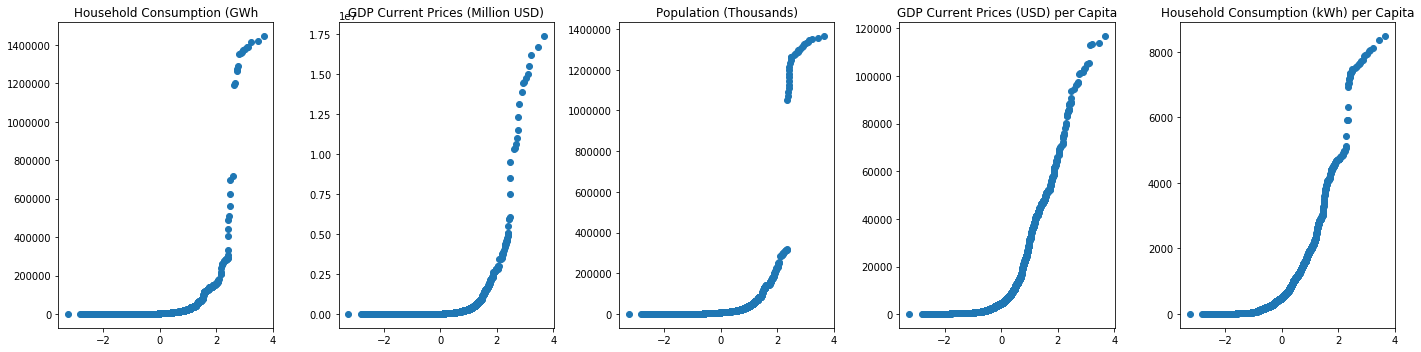

In [102]:
#Checking that variables are not normally distributed
plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
plt.plot(norm,a['Household Consumption (GWh)'], "o") 
plt.title('Household Consumption (GWh')

plt.subplot(1, 5, 2)
plt.plot(norm,b['GDP Current Prices (Million USD)'], "o") 
plt.title('GDP Current Prices (Million USD)')

plt.subplot(1, 5, 3)
plt.plot(norm,c['Population (Thousands)'], "o") 
plt.title('Population (Thousands)')

plt.subplot(1, 5, 4)
plt.plot(norm,d['GDP Current Prices (USD) per Capita'], "o") 
plt.title('GDP Current Prices (USD) per Capita')

plt.subplot(1, 5, 5)
plt.plot(norm,e['Household Consumption (kWh) per Capita'], "o") 
plt.title('Household Consumption (kWh) per Capita')

plt.tight_layout()
plt.show()

In [103]:
#result[['Household Consumption (GWh)']].plot(figsize=(26, 5))

In [104]:
#result[['GDP Current Prices (USD) per Capita']].boxplot(figsize=(26, 5))

In [105]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(result, alpha=0.2, figsize=(30, 30), diagonal='bar')

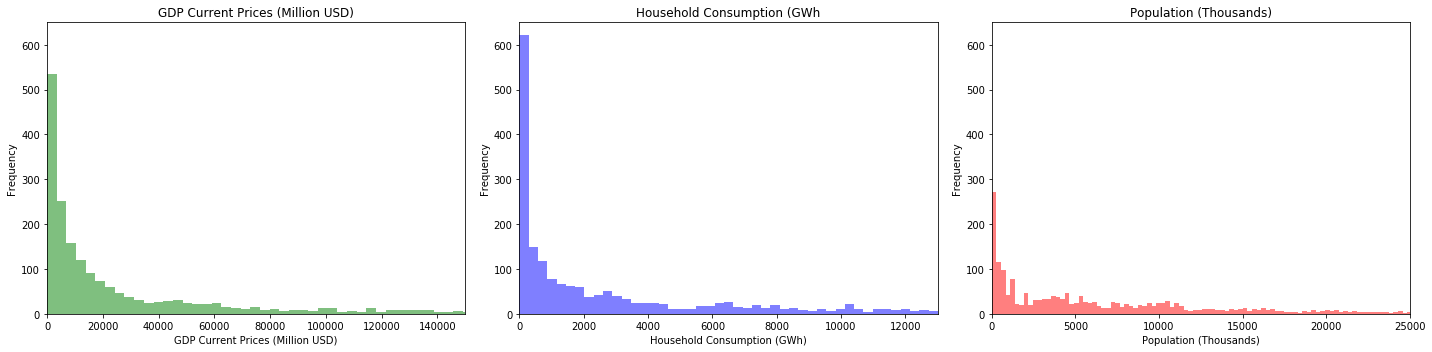

In [106]:
#Histograms
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.xlabel("GDP Current Prices (Million USD)")
plt.ylabel("Frequency")
plt.hist(result['GDP Current Prices (Million USD)'], bins= 5000 ,facecolor='green', alpha=0.5)
plt.axis([0, 150000, 0, 650])
plt.title('GDP Current Prices (Million USD)')

plt.subplot(1, 3, 2)
plt.xlabel("Household Consumption (GWh)")
plt.ylabel("Frequency")
plt.hist(result['Household Consumption (GWh)'], bins=5000 ,facecolor='blue', alpha=0.5)
plt.axis([0, 13000, 0, 650])
plt.title('Household Consumption (GWh')

plt.subplot(1, 3, 3)
plt.xlabel("Population (Thousands)")
plt.ylabel("Frequency")
plt.hist(result['Population (Thousands)'], bins=5000 ,facecolor='red', alpha=0.5)
plt.axis([0, 25000, 0, 650])
plt.title('Population (Thousands)')


plt.tight_layout()
plt.show()



In [107]:
#result2 = result1.drop(result.index[result.Country == 'China'])

In [108]:
#result2['GDP Current Prices (Million USD)'].idxmax()
#result2.loc[result2['GDP Current Prices (Million USD)'] > 10000000]

In [109]:
result1 = result.loc[result['Continent']=='North America']
result2=result1.drop_duplicates('Country')
result2.head(100)

,Country,Year,Household Consumption (GWh),GDP Current Prices (Million USD),Population (Thousands),GDP Current Prices (USD) per Capita,Household Consumption (kWh) per Capita,Continent
105,Antigua and Barbuda,2014,9.500000e+01,1.220976e+03,90.900,13432.079208,1045.104510,North America
255,Barbados,2014,3.007200e+02,4.354500e+03,283.380,15366.292611,1061.189922,North America
300,Belize,2014,2.640361e+02,1.717862e+03,351.706,4884.368620,750.729618,North America
331,Bermuda,2013,2.440000e+02,5.573710e+03,65.001,85748.065414,3753.788403,North America
540,Canada,2014,1.615680e+05,1.783776e+06,35543.658,50185.481497,4545.621050,North America
563,Cayman Islands,2006,2.370000e+02,3.207033e+03,50.028,64104.751598,4737.347086,North America
705,Costa Rica,2014,3.516000e+03,4.955264e+04,4757.606,10415.456650,739.027149,North America
751,Cuba,2013,7.733500e+03,7.714970e+04,11362.505,6789.849597,680.615762,North America
840,Dominica,2014,4.168000e+01,5.246050e+02,72.341,7251.835059,576.160130,North America
855,Dominican Republic,2014,5.225300e+03,6.396891e+04,10405.943,6147.343569,502.145745,North America


In [110]:
#result1=result.groupby(['Year', 'Continent'])['Continent','Country','Year','Household Consumption (GWh)','GDP Current Prices (Million USD)', 'Population (Thousands)', 'GDP Current Prices (USD) per Capita','Household Consumption (kWh) per Capita']
result1 = result.loc[result['Continent'] == 'Europe']
result2 = result1.drop_duplicates('Country')
result1

,Country,Year,Household Consumption (GWh),GDP Current Prices (Million USD),Population (Thousands),GDP Current Prices (USD) per Capita,Household Consumption (kWh) per Capita,Continent
15,Albania,2014,3500.000,1.327796e+04,2893.654,4588.649440,1209.543366,Europe
16,Albania,2013,3859.530,1.278103e+04,2896.652,4412.345578,1332.410659,Europe
17,Albania,2012,3052.330,1.231978e+04,2900.247,4247.839852,1052.437948,Europe
18,Albania,2011,2711.740,1.289087e+04,2904.780,4437.811999,933.544021,Europe
19,Albania,2010,2587.440,1.192695e+04,2913.021,4094.358832,888.232526,Europe
20,Albania,2009,2604.650,1.204421e+04,2927.519,4114.136545,889.712415,Europe
21,Albania,2008,2325.580,1.288135e+04,2947.314,4370.539647,789.050641,Europe
22,Albania,2007,1965.100,1.070101e+04,2970.017,3603.013685,661.646044,Europe
23,Albania,2006,1977.000,8.992642e+03,2992.547,3005.012903,660.641253,Europe
24,Albania,2005,2733.000,8.158549e+03,3011.487,2709.142931,907.525086,Europe


In [111]:
result1=result.groupby(['Continent']).median()
result1

,Year,Household Consumption (GWh),GDP Current Prices (Million USD),Population (Thousands),GDP Current Prices (USD) per Capita,Household Consumption (kWh) per Capita
Continent,,,,,,
Africa,2007,387.50,6710.743384,10591.851,768.284943,55.634250
Asia,2007,6428.40,40241.972324,8658.011,3590.370719,472.268726
Europe,2007,11026.50,137382.975228,7403.584,23703.031796,1509.258806
North America,2007,1321.00,12501.974600,3805.683,6546.565554,587.904222
Oceania,2007,30.00,608.292551,241.876,3130.352598,213.344478
South America,2007,4528.65,55836.200084,14569.455,5076.276823,474.936402


In [112]:
result2=result.groupby(['Continent']).mean()
result3 = result2.sort_values(['Household Consumption (GWh)'])
result3

,Year,Household Consumption (GWh),GDP Current Prices (Million USD),Population (Thousands),GDP Current Prices (USD) per Capita,Household Consumption (kWh) per Capita
Continent,,,,,,
Africa,2007.011401,2407.816958,27829.543892,17388.938423,2252.325707,164.014675
Oceania,2007.127389,6676.898191,99983.678214,3213.994943,9398.397241,766.420178
South America,2006.888889,15860.412141,221560.045285,32033.643889,7058.507260,692.218717
Europe,2007.063177,27481.307056,461382.627344,19153.299330,28485.976956,1740.337643
Asia,2007.055749,32571.860371,371188.375917,96079.560380,10828.308538,1220.659516
North America,2006.935860,68638.368301,718646.769277,23001.992936,14266.946964,1163.931005


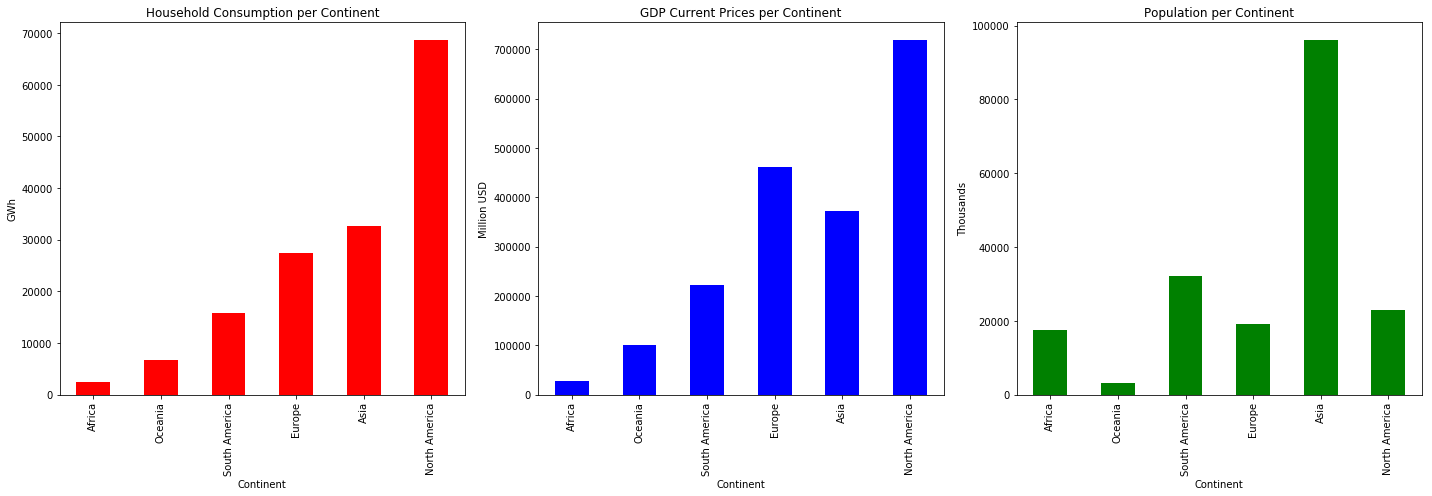

In [125]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 3, 1)

result3['Household Consumption (GWh)'].plot(kind='bar', color='red')
plt.ylabel('GWh')
plt.title('Household Consumption per Continent')

plt.subplot(1, 3, 2)
result3['GDP Current Prices (Million USD)'].plot(kind='bar', color='blue')
plt.ylabel('Million USD')
plt.title('GDP Current Prices per Continent')

plt.subplot(1, 3, 3)
result3['Population (Thousands)'].plot(kind='bar', color='green')
plt.ylabel('Thousands')
plt.title('Population per Continent')

plt.tight_layout()
plt.show()

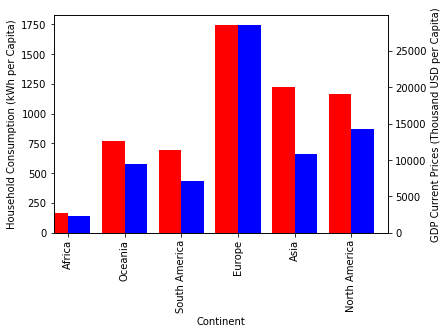

In [129]:
fig = plt.figure() 

ax = fig.add_subplot(111) 

ax2 = ax.twinx() 

width = 0.4

result3['Household Consumption (kWh) per Capita'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
result3['GDP Current Prices (USD) per Capita'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Household Consumption (kWh per Capita)')
ax2.set_ylabel('GDP Current Prices (Thousand USD per Capita)')

plt.show()

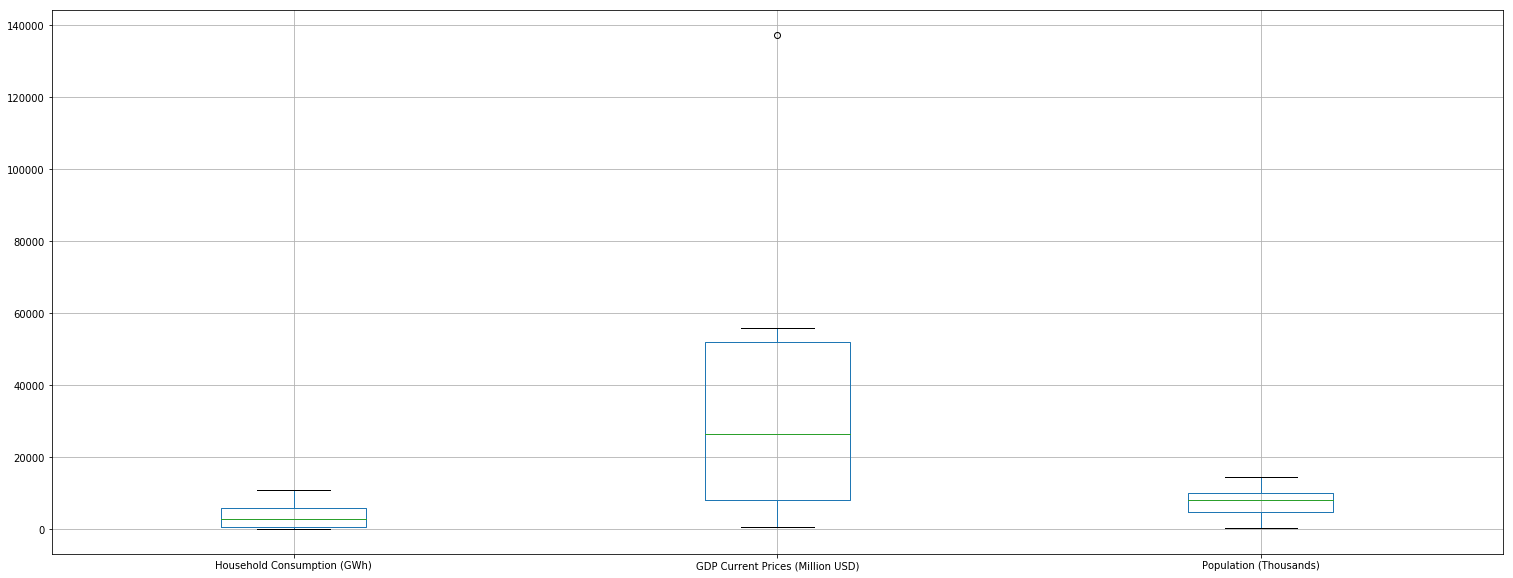

In [114]:
result1[['Household Consumption (GWh)', 'GDP Current Prices (Million USD)', 'Population (Thousands)' ]].boxplot(figsize=(26, 10))

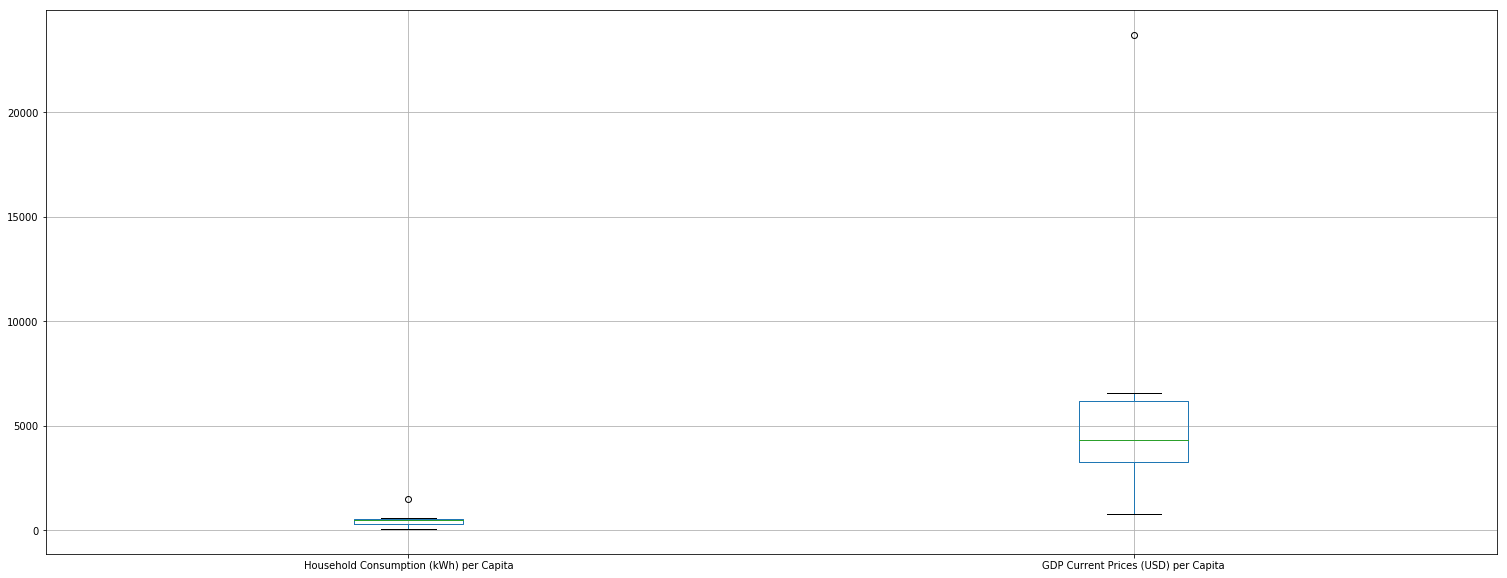

In [115]:
result1[['Household Consumption (kWh) per Capita','GDP Current Prices (USD) per Capita']].boxplot(figsize=(26, 10))

In [116]:
a= result1.describe()
b=a.drop('Year',1)
b

,Household Consumption (GWh),GDP Current Prices (Million USD),Population (Thousands),GDP Current Prices (USD) per Capita,Household Consumption (kWh) per Capita
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3953.675000,42213.693028,7545.076667,7135.813739,552.224481
std,4278.399721,51226.765757,5043.870989,8345.309198,508.132980
min,30.000000,608.292551,241.876000,768.284943,55.634250
25%,620.875000,8158.551188,4705.158250,3245.357128,278.075540
50%,2924.825000,26371.973462,8030.797500,4333.323771,473.602564
75%,5953.462500,51937.643144,10108.391000,6178.993371,559.662267
max,11026.500000,137382.975228,14569.455000,23703.031796,1509.258806


In [117]:
#result['Household Consumption (GWh)'] = (result['Household Consumption (GWh)']-min(result['Household Consumption (GWh)']))/(max(result['Household Consumption (GWh)'])-min(result['Household Consumption (GWh)']))
#result['GDP Current Prices (USD)'] = (result['GDP Current Prices (USD)']-min(result['GDP Current Prices (USD)']))/(max(result['GDP Current Prices (USD)'])-min(result['GDP Current Prices (USD)']))
#result['Population'] = (result['Population']-min(result['Population']))/(max(result['Population'])-min(result['Population']))

In [118]:
result1=result.groupby(['Continent','Year']).median()
result1

Household Consumption (GWh)  \
Continent     Year                                
Africa        2000                   280.826000   
              2001                   282.500000   
              2002                   298.379000   
              2003                   311.100000   
              2004                   344.000000   
              2005                   341.000000   
              2006                   338.000000   
              2007                   340.000000   
              2008                   388.000000   
              2009                   413.000000   
              2010                   445.000000   
              2011                   480.000000   
              2012                   510.000000   
              2013                   536.000000   
              2014                   554.870000   
Asia          2000                  5614.000000   
              2001                  5985.000000   
              2002                  4926.500000   
              2003                  5154.000000   
              2004                  4962.000000   
              2005                  6229.000000   
              2006                  6637.000000   
              2007                  6821.000000   
              2008                  6567.291666   
              2009                  6261.400000   
              2010                  7197.000000   
              2011                  7172.350000   
              2012                  6629.500000   
              2013                  6754.900000   
              2014                  7292.000000   
...                                         ...   
Oceania       2000                    41.446000   
              2001                    43.640500   
              2002                    36.102000   
              2003                    35.120500   
              2004                    35.974500   
              2005                    37.284500   
              2006                    36.352500   
              2007                    38.422000   
              2008                    41.312500   
              2009                    26.000000   
              2010                    26.100000   
              2011                    27.000000   
              2012                    28.200000   
              2013                    27.440000   
              2014                    27.440000   
South America 2000                  2894.000000   
              2001                  2916.000000   
              2002                  3098.000000   
              2003                  3270.000000   
              2004                  3516.000000   
              2005                  3701.000000   
              2006                  3895.000000   
              2007                  4095.000000   
              2008                  4385.000000   
              2009                  4672.300000   
              2010                  5114.200000   
              2011                  5350.900000   
              2012                  7142.850000   
              2013                  7234.405000   
              2014                  7643.500000   

                    GDP Current Prices (Million USD)  Population (Thousands)  \
Continent     Year                                                             
Africa        2000                       3298.022004               9175.8325   
              2001                       3465.305993               8955.7560   
              2002                       3889.758024               9114.2870   
              2003                       4703.504466               9353.5160   
              2004                       4838.551100               9710.4980   
              2005                       6245.031690              10029.0000   
              2006                       6731.529168              10127.9000   
              2007                       7792.052680              10225.1000   
      

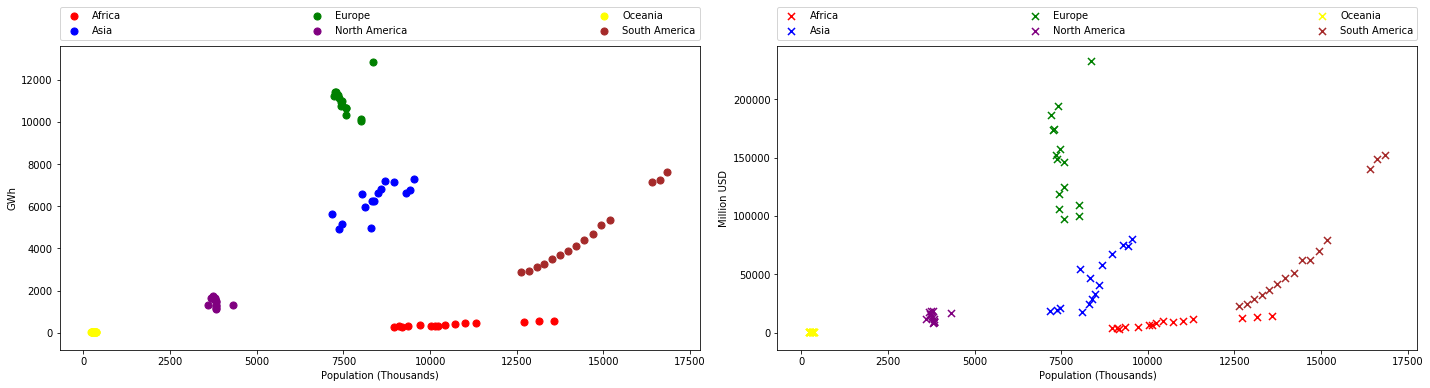

In [122]:
import itertools
C = result1.index.levels[0]
colors = itertools.cycle(["r", "b", "g", 'purple','yellow','brown'])

plt.figure(figsize=(20, 5))


plt.subplot(1, 2, 1)
for cont in C :
    graph = result1.loc[cont]
    plt.scatter(x=graph['Population (Thousands)'], y=graph['Household Consumption (GWh)'], color = next(colors), marker = 'o', s = 50, label=cont)
plt.ylabel('GWh')
plt.xlabel('Population (Thousands)')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.)

#plt.ylim([20000, 160000])
#plt.title('Electricity consumption')
#plt.show()

plt.subplot(1, 2, 2)
for cont in C :
    graph = result1.loc[cont]
    plt.scatter(x=graph['Population (Thousands)'], y=graph['GDP Current Prices (Million USD)'], color = next(colors),marker = 'x', s = 50, label=cont)
plt.ylabel('Million USD')
plt.xlabel('Population (Thousands)')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.)

plt.tight_layout()
plt.show()

In [136]:
#import itertools

#C = result1.index.levels[0]
#colors = itertools.cycle(["r", "b", "g", 'purple','yellow','brown'])

#plt.figure(figsize=(20, 5))

#plt.subplot(1, 2, 1)
#for cont in C :
#    graph = result1.loc[cont]
#    plt.scatter(x=graph.index, y=graph['Household Consumption (kWh) per Capita'], color = next(colors), marker= 'o', label = cont)
#plt.ylabel('kWh per Capita')
#plt.xlabel('Year')
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.)

#plt.subplot(1, 2, 2)
#for cont in C :
#    graph = result1.loc[cont]
#    plt.scatter(x=graph.index, y=graph['GDP Current Prices (USD) per Capita'], color = next(colors), marker= 'o', label = cont)
#plt.ylabel('Thousand USD per capita')
#plt.xlabel('Year')
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.)

#plt.tight_layout()
#plt.show()

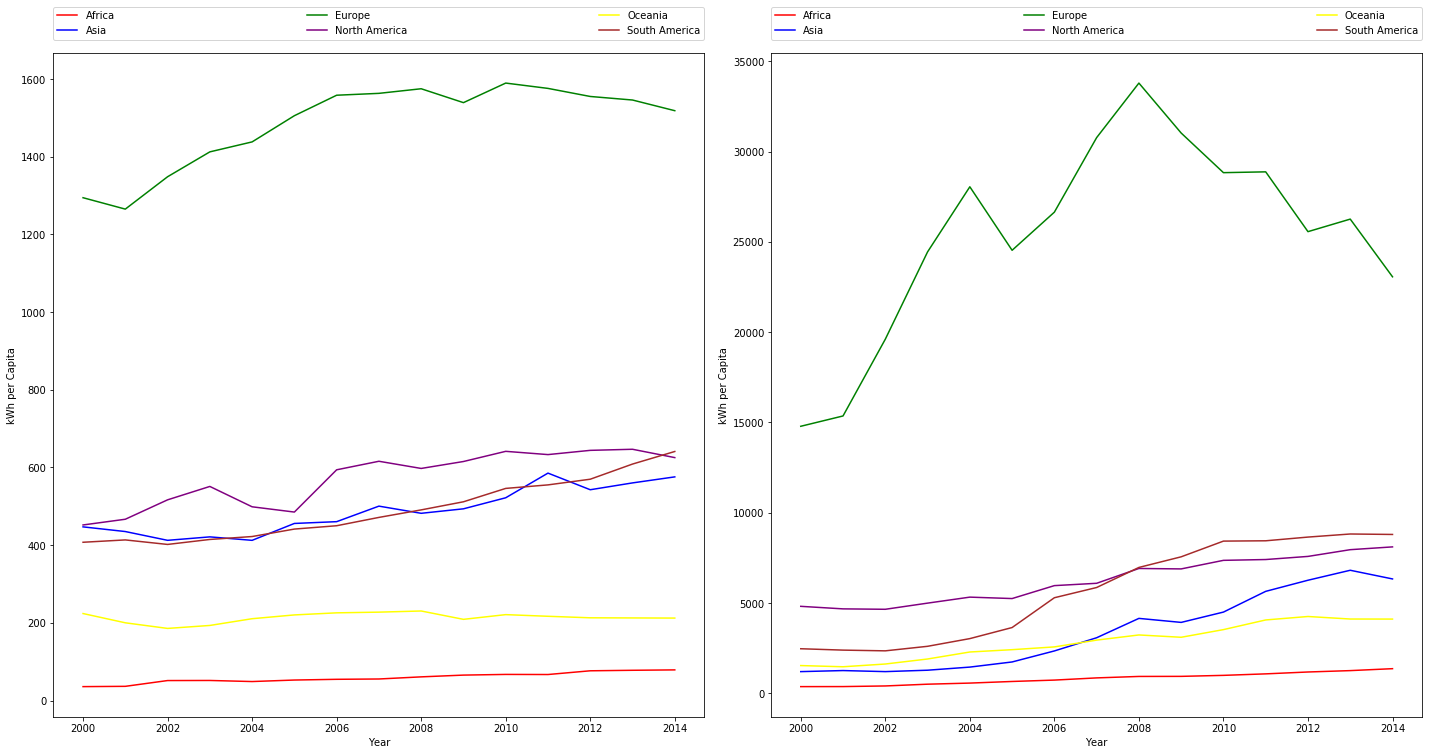

In [124]:
import itertools

C = result1.index.levels[0]
colors = itertools.cycle(["r", "b", "g", 'purple','yellow','brown'])

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
for cont in C :
    graph = result1.loc[cont]
    plt.plot(graph.index, graph['Household Consumption (kWh) per Capita'], color = next(colors), linestyle = "-", label = cont)
plt.ylabel('kWh per Capita')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.)

plt.subplot(1, 2, 2)
for cont in C :
    graph = result1.loc[cont]
    plt.plot(graph.index, graph['GDP Current Prices (USD) per Capita'], color = next(colors), linestyle = "-", label = cont)
plt.ylabel('kWh per Capita')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.)

plt.tight_layout()
plt.show()


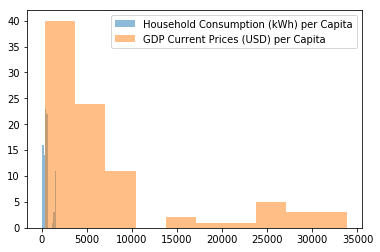

In [135]:
plt.hist(result1['Household Consumption (kWh) per Capita'], alpha=0.5, label='Household Consumption (kWh) per Capita') 
plt.hist(result1['GDP Current Prices (USD) per Capita'], alpha=0.5, label='GDP Current Prices (USD) per Capita') 
plt.legend(loc='upper right') 
plt.show()

In [134]:
print(ttest_ind(result1['GDP Current Prices (USD) per Capita'],result1['Household Consumption (kWh) per Capita'], equal_var=False))

Ttest_indResult(statistic=7.4664442519243286, pvalue=5.1896994018585456e-11)
